## Классификация изображений


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

1. Загрузите датасет Olivetti faces;
2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.
3. Выведите информацию о количественных параметрах датасета;

In [2]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
print(f'images: {faces.images.shape}')
print(f'data: {faces.data.shape}')
print(f'target: {faces.target.shape}')

images: (400, 64, 64)
data: (400, 4096)
target: (400,)


In [5]:
# данные нормализованны
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

1.0
0.0
0.5470426


4. Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

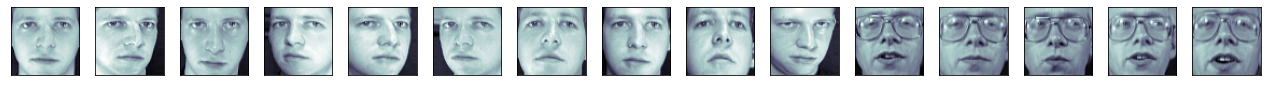

In [6]:
# выведем первые 15 изображений

fig = plt.figure(figsize=(30, 30))
for i in range(15):
    p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    p.imshow(faces.images[i], cmap=plt.cm.bone)

5. Разделите эти данные на тестовую и обучающую выборки;


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=.3, random_state=0)

6. Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;


In [8]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False).fit(X_train, y_train)

svc

SVC(kernel='linear')

7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
    - достоверность предсказания (accuracy);
    - точность (precision);
    - полнота (recall);


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# accuracy - процент верных предсказаний
print('ACCURACY')
print(accuracy_score(y_train, svc.predict(X_train)))
print(accuracy_score(y_test, svc.predict(X_test)))

# precision - сколько верных среди предсказанных ("Класс 1/да")
print('\nPRECISION')
print(precision_score(y_train, svc.predict(X_train), average='macro'))
print(precision_score(y_test, svc.predict(X_test), average='macro'))

# recall - сколько из настоящих "Класс 1/да" определены верно
print('\nRECALL')
print(recall_score(y_train, svc.predict(X_train), average='macro'))
print(recall_score(y_test, svc.predict(X_test), average='macro'))

ACCURACY
1.0
0.9583333333333334

PRECISION
1.0
0.9471916971916972

RECALL
1.0
0.9461538461538461


значения получены высокие (100% по обучающей выборке и более 95% по тестовой) - качество модели отличное

8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

In [10]:
trainings, tests, size = [], [], np.linspace(0.6, 0.1, num=20)

for test_size in np.linspace(0.6, 0.1, num=20):
    X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                        faces.target,
                                                        test_size=test_size,
                                                        random_state=True)
    clf = svc.fit(X_train, y_train)
    trainings.append(clf.score(X_train, y_train))
    tests.append(clf.score(X_test, y_test))

Text(0, 0.5, 'Точность')

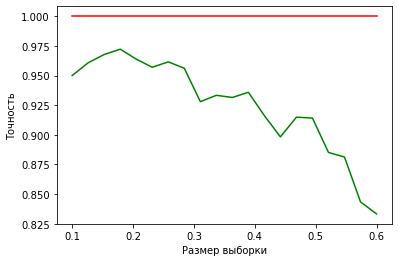

In [11]:
fig, ax = plt.subplots()
ax.plot(size, trainings, "r")
ax.plot(size, tests, "g")
ax.set_xlabel("Размер выборки")
ax.set_ylabel("Точность")

9. Сделайте вывод о применимости модели.

Модель с увеличением выборки при знакомых данных дает 100% результат, а вот с неизвествными точность падает сильно. Что не есть хорошо. Она не даст хорошего результата в дальнейшей работе. 

## Дополнительные задания

1. Постройте модели классификации на основе следующих методов:
    - логистическая регрессия (LogisticRegression);
    - метод опорных векторов с гауссовым ядром (SVC);
    - метод опорных векторов с полиномиальным ядром (SVC);
    - метод k ближайших соседей (KNeighborsClassifier);
    - многослойный перцептрон (MLP)
     
2. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;  

4. Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.

1️⃣ логистическая регрессия (LogisticRegression)

In [12]:
%%time
lr = LogisticRegression(max_iter=2000).fit(X_train, y_train)

CPU times: user 1min 14s, sys: 896 ms, total: 1min 15s
Wall time: 41.7 s


In [13]:
lr_predict_train = lr.predict(X_train)
lr_predict_test = lr.predict(X_test)

print('ACCURACY')
print(accuracy_score(y_train, lr_predict_train))
print(accuracy_score(y_test, lr_predict_test))

print('\nPRECISION')
print(precision_score(y_train, lr_predict_train, average='macro'))
print(precision_score(y_test, lr_predict_test, average='macro'))

print('\nRECALL')
print(recall_score(y_train, lr_predict_train, average='macro'))
print(recall_score(y_test, lr_predict_test, average='macro'))

ACCURACY
1.0
0.95

PRECISION
1.0
0.9224137931034483

RECALL
1.0
0.9137931034482759


2️⃣ метод опорных векторов с гауссовым ядром (SVC)

In [14]:
%%time
SVC_rbf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=5,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=.001, verbose=False).fit(X_train, y_train).fit(X_train, y_train)

CPU times: user 2.02 s, sys: 31 ms, total: 2.05 s
Wall time: 1.09 s


In [15]:
SVC_rbf_predict_train = SVC_rbf.predict(X_train)
SVC_rbf_predict_test = SVC_rbf.predict(X_test)

print('ACCURACY')
print(accuracy_score(y_train, SVC_rbf_predict_train))
print(accuracy_score(y_test, SVC_rbf_predict_test))

print('\nPRECISION')
print(precision_score(y_train, SVC_rbf_predict_train, average='macro'))
print(precision_score(y_test, SVC_rbf_predict_test, average='macro'))

print('\nRECALL')
print(recall_score(y_train, SVC_rbf_predict_train, average='macro'))
print(recall_score(y_test, SVC_rbf_predict_test, average='macro'))

ACCURACY
0.9972222222222222
0.925

PRECISION
0.9972222222222221
0.8888888888888888

RECALL
0.9974999999999999
0.8722222222222221


3️⃣ метод опорных векторов с полиномиальным ядром (SVC)

In [16]:
%time
SVC_pol = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=5,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=.001, verbose=False).fit(X_train, y_train).fit(X_train, y_train)

CPU times: user 4 µs, sys: 30 µs, total: 34 µs
Wall time: 10 µs


In [17]:
SVC_pol_predict_train = SVC_pol.predict(X_train)
SVC_pol_predict_test = SVC_pol.predict(X_test)

print('ACCURACY')
print(accuracy_score(y_train, SVC_pol_predict_train))
print(accuracy_score(y_test, SVC_pol_predict_test))

print('\nPRECISION')
print(precision_score(y_train, SVC_pol_predict_train, average='macro'))
print(precision_score(y_test, SVC_pol_predict_test, average='macro'))

print('\nRECALL')
print(recall_score(y_train, SVC_pol_predict_train, average='macro'))
print(recall_score(y_test, SVC_pol_predict_test, average='macro'))

ACCURACY
1.0
0.925

PRECISION
1.0
0.8764367816091954

RECALL
1.0
0.8793103448275862


4️⃣ метод k ближайших соседей (KNeighborsClassifier)

In [18]:
%time
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [19]:
knn_predict_train = knn.predict(X_train)
knn_predict_test = knn.predict(X_test)

print('ACCURACY')
print(accuracy_score(y_train, knn_predict_train))
print(accuracy_score(y_test, knn_predict_test))

print('\nPRECISION')
print(precision_score(y_train, knn_predict_train, average='macro'))
print(precision_score(y_test, knn_predict_test, average='macro'))

print('\nRECALL')
print(recall_score(y_train, knn_predict_train, average='macro'))
print(recall_score(y_test, knn_predict_test, average='macro'))

ACCURACY
0.975
0.9

PRECISION
0.9781349206349207
0.8764367816091954

RECALL
0.9730257936507936
0.8620689655172413


5️⃣ многослойный перцептрон (MLP)

In [20]:
%time
mlp = MLPClassifier(solver='lbfgs', alpha=.001,
                     hidden_layer_sizes=(55,35), random_state=1).fit(X_train, y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


In [21]:
mlp_predict_train = mlp.predict(X_train)
mlp_predict_test = mlp.predict(X_test)

print('ACCURACY')
print(accuracy_score(y_train, mlp_predict_train))
print(accuracy_score(y_test, mlp_predict_test))

print('\nPRECISION')
print(precision_score(y_train, mlp_predict_train, average='macro'))
print(precision_score(y_test, mlp_predict_test, average='macro'))

print('\nRECALL')
print(recall_score(y_train, mlp_predict_train, average='macro'))
print(recall_score(y_test, mlp_predict_test, average='macro'))

ACCURACY
1.0
0.875

PRECISION
1.0
0.861111111111111

RECALL
1.0
0.8388888888888888


✏️ Самая долгообучаемая модель - LogisticRegression. При этом она дает очень хорошие результаты, наилучшие результаты на данном датасете (accuracy - 95%, precision - 92%, recall - 91%). 
Многослойный перцептрон получилось обучить быстрее всего, при этом результат он дает чуть похуже (accuracy - 88%, precision - 86%, recall - 84%). Чуть получше будет KNeighborsClassifier  
  
✏️ Тем не менее, с учетом скорости обучения и результат метрик, я бы остановилась на методе опорных векторов с гауссовым ядром (accuracy - 93%, precision - 89%, recall - 87%; обучается за 1.5 секунды)

4. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

In [22]:
def training_curve(model):
    trainings, tests, size = [], [], np.linspace(0.6, 0.1, num=20)

    for test_size in np.linspace(0.6, 0.1, num=20):
        X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                            faces.target,
                                                            test_size=test_size,
                                                            random_state=True)
        clf = model.fit(X_train, y_train)
        trainings.append(clf.score(X_train, y_train))
        tests.append(clf.score(X_test, y_test))
        
    fig, ax = plt.subplots()
    ax.plot(size, trainings, "r")
    ax.plot(size, tests, "g")
    ax.set_xlabel("Размер выборки")
    ax.set_ylabel("Точность")

1️⃣ логистическая регрессия (LogisticRegression)

In [ ]:
training_curve(lr)

   модель _переобучена_   
   (прекрасный результат на обучающей выборке, но не хороший на тестовой)

2️⃣ метод опорных векторов с гауссовым ядром (SVC)

In [ ]:
training_curve(SVC_rbf)

   модель _переобучена_   
   (прекрасный результат на обучающей выборке, но не хороший на тестовой)

3️⃣ метод опорных векторов с полиномиальным ядром (SVC)

In [ ]:
training_curve(SVC_pol)

   модель _переобучена_  
   (прекрасный результат на обучающей выборке, но не хороший на тестовой)

4️⃣ метод k ближайших соседей (KNeighborsClassifier)

In [ ]:
training_curve(knn)

   модель _недообучена_  
   (с увеличением размера выборки точной результата падает на обеих выборках)

5️⃣ многослойный перцептрон (MLP)

In [ ]:
training_curve(mlp)

   модель _переобучена_  
   (прекрасный результат на обучающей выборке, но не хороший на тестовой)

5. (*) Используйте сверточную нейронную сеть для решения той же задачи. Сравните ее эффективность и производительность с классическими моделями.




## Контрольные вопросы



__1. Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?__

📝 Для данной выборке модель классификатора метода опорных векторов с линейным ядром было выбрано верно. Результаты метрик очень хорошие (>95% по каждой из метрик по тестовой выборке).

__2. Как представляется изображение в методах машинного обучения? От чего зависит размерность вектора признаков?__


📝 В нейронных моделях для этого используются свертки. Самый простой способ - просто представить изображение как линейную последовательность пикселей. Если изображение имеет разрешение 64 на 64 пикселя, то всего пикселей получается 4096. Если изображение черно-белое (в градациях серого), то значением признака, соответствующего каждому пикселю можно взять яркость этого пикселя. Если изображение цветное, то каждому пикселю может соответствовать три разных признака. Причем обычно такие значения нормируются к шкале долей единицы.



__3. Какие задачи можно решать при помощи анализа изображений? Какие из них самые распространенные?__

📝 Задачи
- Сегментация изображений
- _Детектирование объектов_
- _Классификация изображений_
- Отслеживание движущихся объектов во времени
- Распознавание лиц
- _Оптическое распознавание символов_
- Генерация изображений

(в целом, все они очень распространены)

__4. Какие известные датасеты изображений существуют? Для каких задач они применяются?__



📝 Датасеты
- __Iris__ — небольшой набор данных для задачи классификации, в нем представлены по 50 описаний цветков одного из трех типов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor)  
- __MNIST__ — большой набор картинок с рукописными цифрами, часто используемый для тестирования различных алгоритмов распознавания образов  
- __CIFAR-10__ (Canadian Institute For Advanced Research) — большой набор изображений, который обычно используется для тестирования алгоритмов машинного обучения. Он содержит 60 000 цветных картинок размером 32х32 пикселя, размеченных в один из десяти классов: самолеты, автомобили, коты, олени, собаки, лягушки, лошади, корабли и грузовики  
- __Imagenet__ — проект по созданию и сопровождению массивной базы данных аннотированных изображений. Аннотация изображений происходит путем краудсорсинга сообществом. Из-за этого достигается большое количество размеченных данных. Особенность данного набора данных — про каждую картинку известно несколько фактов вида "в этом прямоугольнике есть автомобиль", что в совокупности с индексом по типам объектов, которые есть на изображениях, позволяет обучить алгоритм для распознавания объектов какой-то конкретной категории.